In [16]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 이미지의 밝기 조절하기

In [51]:
src=cv2.imread('./fig/lenna.bmp',0)
src1=cv2.imread('./fig/lenna.bmp')
dst=np.clip(src+100.,0,255).astype(np.uint8)
#np.clip을 사용하는 방법과 cv2.add방법 두가지 있음 단 컬러시에는 bgr값으로 입력해야함
dst1=cv2.add(src1,(100,100,100,0))#<- 컬러이미지시 (100,100,100)형식으로 값을 입력해야며 색자체도 이상해짐
if src is None:
    print('image read failed')
    sys.exit()
    
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst1',dst1)

cv2.waitKey()
cv2.destroyAllWindows()

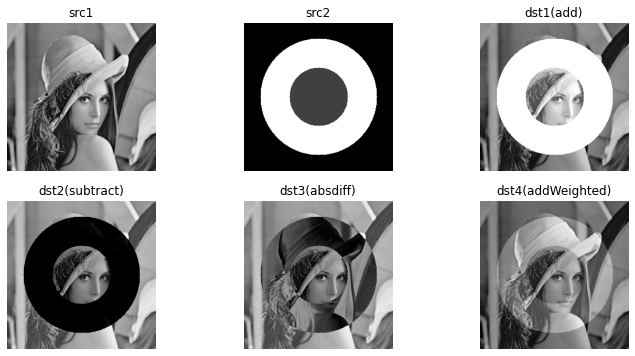

In [54]:
src1=cv2.imread('./fig/lenna256.bmp',0)
src2=np.zeros((256,256),np.uint8)
cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)

dst1=cv2.add(src1,src2)#이미지 두개의 밸류값 더하기
dst2=cv2.subtract(src1,src2)#이미지 밸류값 빼기
dst3=cv2.absdiff(src1,src2)#이미지 밸류값 뺀것의 절대값으로 0보다 작은값도 보임
# addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
dst4=cv2.addWeighted(src1,0.8,src2,0.2,0)#alpha값과 beta값의 합이 1이되어야함


if src is None:
    print('image read failed')
    sys.exit()
    
plt.figure(figsize=(12,6))
plt.subplot(231),plt.imshow(src1,cmap='gray'),plt.axis('off'),plt.title('src1')
plt.subplot(232),plt.imshow(src2,cmap='gray'),plt.axis('off'),plt.title('src2')
plt.subplot(233),plt.imshow(dst1,cmap='gray'),plt.axis('off'),plt.title('dst1(add)')
plt.subplot(234),plt.imshow(dst2,cmap='gray'),plt.axis('off'),plt.title('dst2(subtract)')
plt.subplot(235),plt.imshow(dst3,cmap='gray'),plt.axis('off'),plt.title('dst3(absdiff)')
plt.subplot(236),plt.imshow(dst4,cmap='gray'),plt.axis('off'),plt.title('dst4(addWeighted)')
plt.show()
# cv2.imshow('src1',src1)
# cv2.imshow('src2',src2)
# cv2.imshow('dst1',dst1)
# cv2.imshow('dst2',dst2)
# cv2.imshow('dst3',dst3)
# cv2.imshow('dst4',dst4)


cv2.waitKey()
cv2.destroyAllWindows()

### 두개의 이미지를 addWeighted함수를 이용하여 그라데이션출력해보기

In [55]:
src=cv2.imread('./fig/puppy2.png')#원본이미지
crop=cv2.imread('./fig/hatpuppy_heechang.jpg')#모자와 선글라스 합성된 이미지

for i in range(101):
    alpha=i*0.01
    dst5=cv2.addWeighted(crop,alpha,src,1-alpha,0)#addWeighted함수를 이용하여 두개의 이미지를 교차 출력시키기
    cv2.imshow('dst5',dst5)#50ms마다 i값이 변화된 dst5 이미지를 출력하기
    if cv2.waitKey(50)==27:
        break
    if i==100:
        cv2.waitKey()

cv2.destroyAllWindows()

### bitwise함수로 and,or,xor,not 효과 확인하기

In [57]:
src1=np.zeros((256,256),np.uint8)
src2=np.zeros((256,256),np.uint8)

cv2.rectangle(src1,(10,10),(127,250),255,-1)#src1에 사각형 그리기
cv2.circle(src2,(128,128),100,255,-1)#src2에 원 그리기

bit_and=cv2.bitwise_and(src1,src2)
bit_or=cv2.bitwise_or(src1,src2)
bit_xor=cv2.bitwise_xor(src1,src2)
bit_not=cv2.bitwise_not(src1)


cv2.imshow('src1',src1)
cv2.imshow('src2',src2)
cv2.imshow('bit_and',bit_and)
cv2.imshow('bit_or',bit_or)
cv2.imshow('bit_xor',bit_xor)
cv2.imshow('bit_not',bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

### 이미지에서 bgr값을 split해서 출력하기 hsv로 변환후 hsv값 출력해보기

In [58]:
src=cv2.imread('./fig/flowers.jpg',cv2.IMREAD_COLOR)

src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)#bgr값을 hsv로 변환

b,g,r=cv2.split(src)#컬러 이미지 bgr로 밸류값 나누기
h,s,v=cv2.split(src_hsv)#hsv파일 hsv로 밸류값 나누기 h=색상,s=채도,v=밝기(밸류)
# src_merge=cv2.merge((b,g,r))#나눈값을 합치기 hsv일 경우 합친후 다시 cvtColor함수를 이용하여 변환해줘야함

cv2.imshow('src',src_merge)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)
cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)
cv2.waitKey()
cv2.destroyAllWindows()